In [14]:
import pandas as pd
data = pd.read_csv("bank/bank.csv",delimiter=';',header='infer')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
final = data.drop(['job','marital','education','default','housing',
        'contact','day','month','duration','campaign','pdays','previous','poutcome'],axis=1)
final.head()

,age,balance,loan,y
0,30,1787,no,no
1,33,4789,yes,no
2,35,1350,no,no
3,30,1476,yes,no
4,59,0,no,no


In [16]:
final.isnull().sum() #都沒有缺失

age        0
balance    0
loan       0
y          0
dtype: int64

In [17]:
final.y.replace(('yes','no'),(1,0),inplace=True)
final.loan.replace(('yes','no'),(1,0),inplace=True)
final.head()

,age,balance,loan,y
0,30,1787,0,0
1,33,4789,1,0
2,35,1350,0,0
3,30,1476,1,0
4,59,0,0,0


In [18]:
X = final.drop(['y'],axis=1)
Y = final.drop(['age','balance','loan'],axis=1)
X.head()

,age,balance,loan
0,30,1787,0
1,33,4789,1
2,35,1350,0
3,30,1476,1
4,59,0,0


In [19]:
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [22]:
X.shape[0]

4521

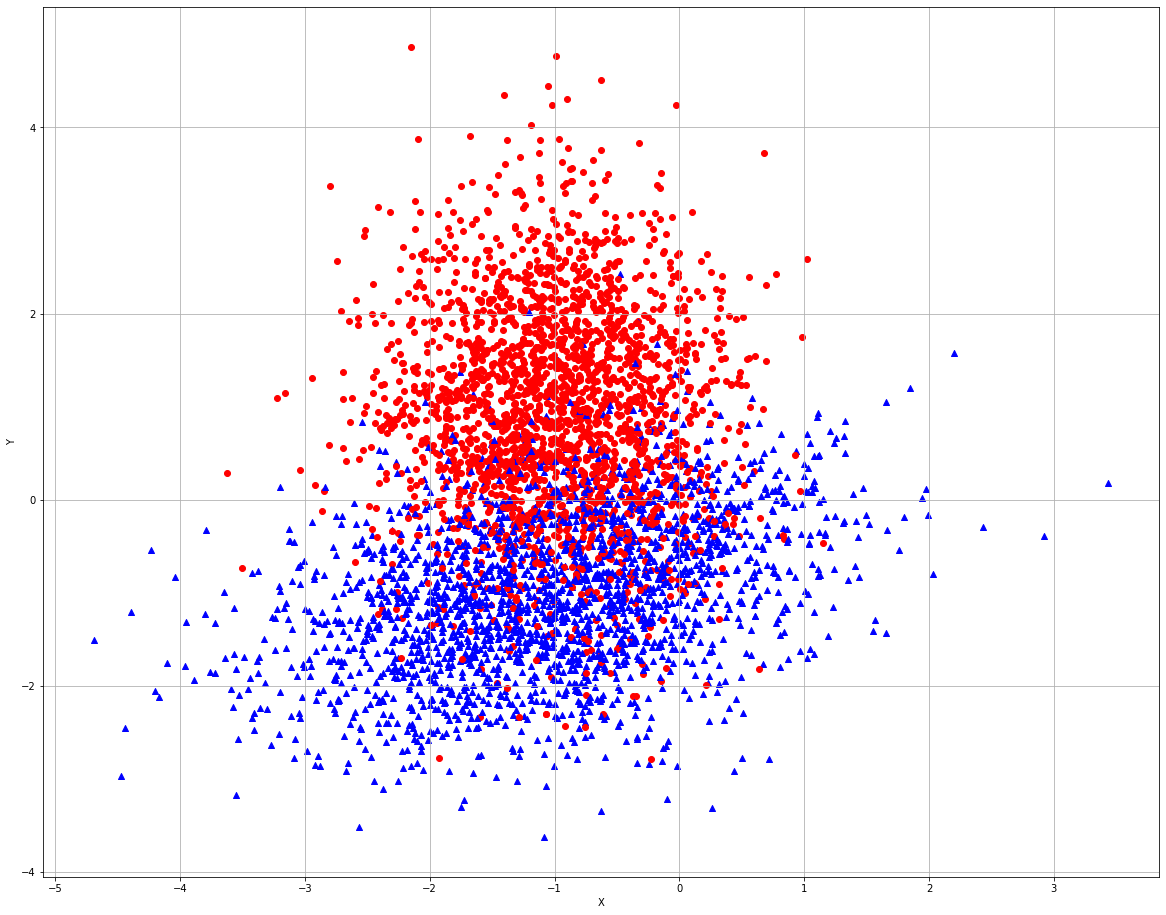

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')
    plt.show()
nb_samples = X.shape[0]
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
show_dataset(X, Y)


In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Create logistic regressor
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % lr.score(X_test, Y_test))


Logistic regression score: 0.846


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
lr.intercept_


array([0.21538855])

In [30]:
lr.coef_

array([[ 0.40943494, -2.0659369 ]])

In [42]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=1000)  #log='logistics' loss='perceptron' #max_iter=epoch
sgd.fit(X_train, Y_train)
sgd.score(X_test, Y_test)


0.8443854995579133

In [43]:
import numpy as np
from sklearn import linear_model
X = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
Y = np.array([1,1,2,2])
clf = linear_model.SGDClassifier(max_iter=1000,tol=1e-3)
clf.fit(X,Y)
clf.score(X,Y)

1.0

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
'penalty': [ 'l1', 'l2' ],
'C': [ 0.5, 1.0, 1.5, 1.8, 2.0, 2.5]
}]
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10)
gs.fit(iris.data,iris.target)

C:\Users\z3020\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\z3020\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\z3020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\z3020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\z3020\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.5],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [48]:
gs.best_estimator_

LogisticRegression(C=2.5)

In [49]:
cross_val_score(gs.best_estimator_, iris.data, iris.target, scoring='accuracy', cv=10).mean()

C:\Users\z3020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z3020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9800000000000001

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=Y_test, y_pred=lr.predict(X_test))
cm

array([[464, 111],
       [ 63, 493]], dtype=int64)

In [52]:
cm.transpose()[::-1,::-1]

array([[493, 111],
       [ 63, 464]], dtype=int64)

In [53]:
from sklearn.metrics import precision_score
precision_score(Y_test, lr.predict(X_test))

0.8162251655629139

In [54]:
from sklearn.metrics import recall_score
recall_score(Y_test, lr.predict(X_test))


0.8866906474820144

In [55]:
from sklearn.metrics import fbeta_score, f1_score
f1_score(Y_test, lr.predict(X_test))


0.8500000000000001

In [56]:
fbeta_score(Y_test, lr.predict(X_test), beta=1)

0.8500000000000001

In [61]:
from sklearn.metrics import roc_curve
Y_scores = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
Y_scores[0:5]

array([-1.17731678,  3.74530318, -3.38925685,  1.13745165,  4.76904084])

In [62]:
Y_test[0:5]

array([0, 1, 0, 1, 1])

In [63]:
fpr

array([0.        , 0.        , 0.        , 0.00173913, 0.00173913,
       0.00521739, 0.00521739, 0.00695652, 0.00695652, 0.00869565,
       0.00869565, 0.01043478, 0.01043478, 0.01217391, 0.01217391,
       0.01391304, 0.01391304, 0.01565217, 0.01565217, 0.0173913 ,
       0.0173913 , 0.01913043, 0.01913043, 0.0226087 , 0.0226087 ,
       0.02434783, 0.02434783, 0.02608696, 0.02608696, 0.02782609,
       0.02782609, 0.02956522, 0.02956522, 0.03130435, 0.03130435,
       0.03478261, 0.03478261, 0.03652174, 0.03652174, 0.03826087,
       0.03826087, 0.04      , 0.04      , 0.04173913, 0.04173913,
       0.04695652, 0.04695652, 0.04869565, 0.04869565, 0.05043478,
       0.05043478, 0.05217391, 0.05217391, 0.05391304, 0.05391304,
       0.05565217, 0.05565217, 0.0573913 , 0.0573913 , 0.06086957,
       0.06086957, 0.0626087 , 0.0626087 , 0.06608696, 0.06608696,
       0.06956522, 0.06956522, 0.07130435, 0.07130435, 0.07304348,
       0.07304348, 0.07652174, 0.07652174, 0.07826087, 0.07826

In [64]:
tpr

array([0.        , 0.00179856, 0.05935252, 0.05935252, 0.06834532,
       0.06834532, 0.07553957, 0.07553957, 0.10431655, 0.10431655,
       0.11151079, 0.11151079, 0.12410072, 0.12410072, 0.13848921,
       0.13848921, 0.19244604, 0.19244604, 0.23381295, 0.23381295,
       0.25359712, 0.25359712, 0.27158273, 0.27158273, 0.2823741 ,
       0.2823741 , 0.34892086, 0.34892086, 0.38129496, 0.38129496,
       0.39748201, 0.39748201, 0.44064748, 0.44064748, 0.45323741,
       0.45323741, 0.45863309, 0.45863309, 0.46582734, 0.46582734,
       0.47841727, 0.47841727, 0.48381295, 0.48381295, 0.48561151,
       0.48561151, 0.49280576, 0.49280576, 0.5       , 0.5       ,
       0.53776978, 0.53776978, 0.54316547, 0.54316547, 0.55935252,
       0.55935252, 0.58273381, 0.58273381, 0.61151079, 0.61151079,
       0.61330935, 0.61330935, 0.63129496, 0.63129496, 0.6528777 ,
       0.6528777 , 0.65467626, 0.65467626, 0.65827338, 0.65827338,
       0.6618705 , 0.6618705 , 0.66366906, 0.66366906, 0.67266

In [65]:
thresholds

array([ 8.26487534,  7.26487534,  4.40524829,  4.37979014,  4.24935188,
        4.2361752 ,  4.19991815,  4.18479933,  3.9363513 ,  3.91715343,
        3.84077192,  3.83724305,  3.73848636,  3.73724117,  3.68272213,
        3.67876013,  3.30769862,  3.28380471,  3.13875264,  3.13717614,
        3.03101635,  3.02175813,  2.92962191,  2.90797124,  2.8260622 ,
        2.82512225,  2.5043528 ,  2.5004013 ,  2.36438717,  2.32954746,
        2.2853777 ,  2.28347381,  2.12509775,  2.11584258,  2.08058042,
        2.08003187,  2.06176229,  2.0595585 ,  2.04373637,  2.0414052 ,
        2.00210874,  1.99434655,  1.97210059,  1.96883474,  1.96748815,
        1.94407156,  1.90650106,  1.89998952,  1.83713785,  1.83528734,
        1.68732623,  1.68189909,  1.67774472,  1.66687073,  1.61672343,
        1.60044285,  1.52012038,  1.51715494,  1.41195076,  1.39954083,
        1.3984662 ,  1.39750599,  1.34091807,  1.33490446,  1.24363494,
        1.23024745,  1.22925307,  1.22600401,  1.20924004,  1.20

In [66]:
max(Y_scores)

7.2648753386059335

In [67]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9202783859868628

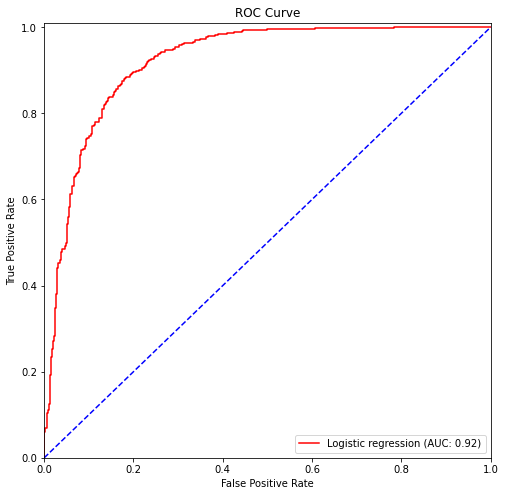

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
